In [0]:
# # One option for dealing with missing data is just removing examples which contains the missing data
# # with .dropna() only the examples with missing values are dropped 
# sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

# Chapter 2 – End-to-end Machine Learning project

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

# Step 1. Big Picture & Setup (See the slides)

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [0]:
import sklearn 
import numpy as np 
import os 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(420)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Step 2. Get the data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd # Pandas module to enable data manipulation

def load_housing_data(housing_path="/content/drive/My Drive/ML"):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path, sep='   |  | ', header=None, names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

In [445]:
housing = load_housing_data()
# Display the first n rows of the data. (n=5 by default)
housing.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [446]:
# Provide a quick summary of the data including name of features, count, and type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [447]:
# Provide some basic statistics about the dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Saving figure attribute_histogram_plots


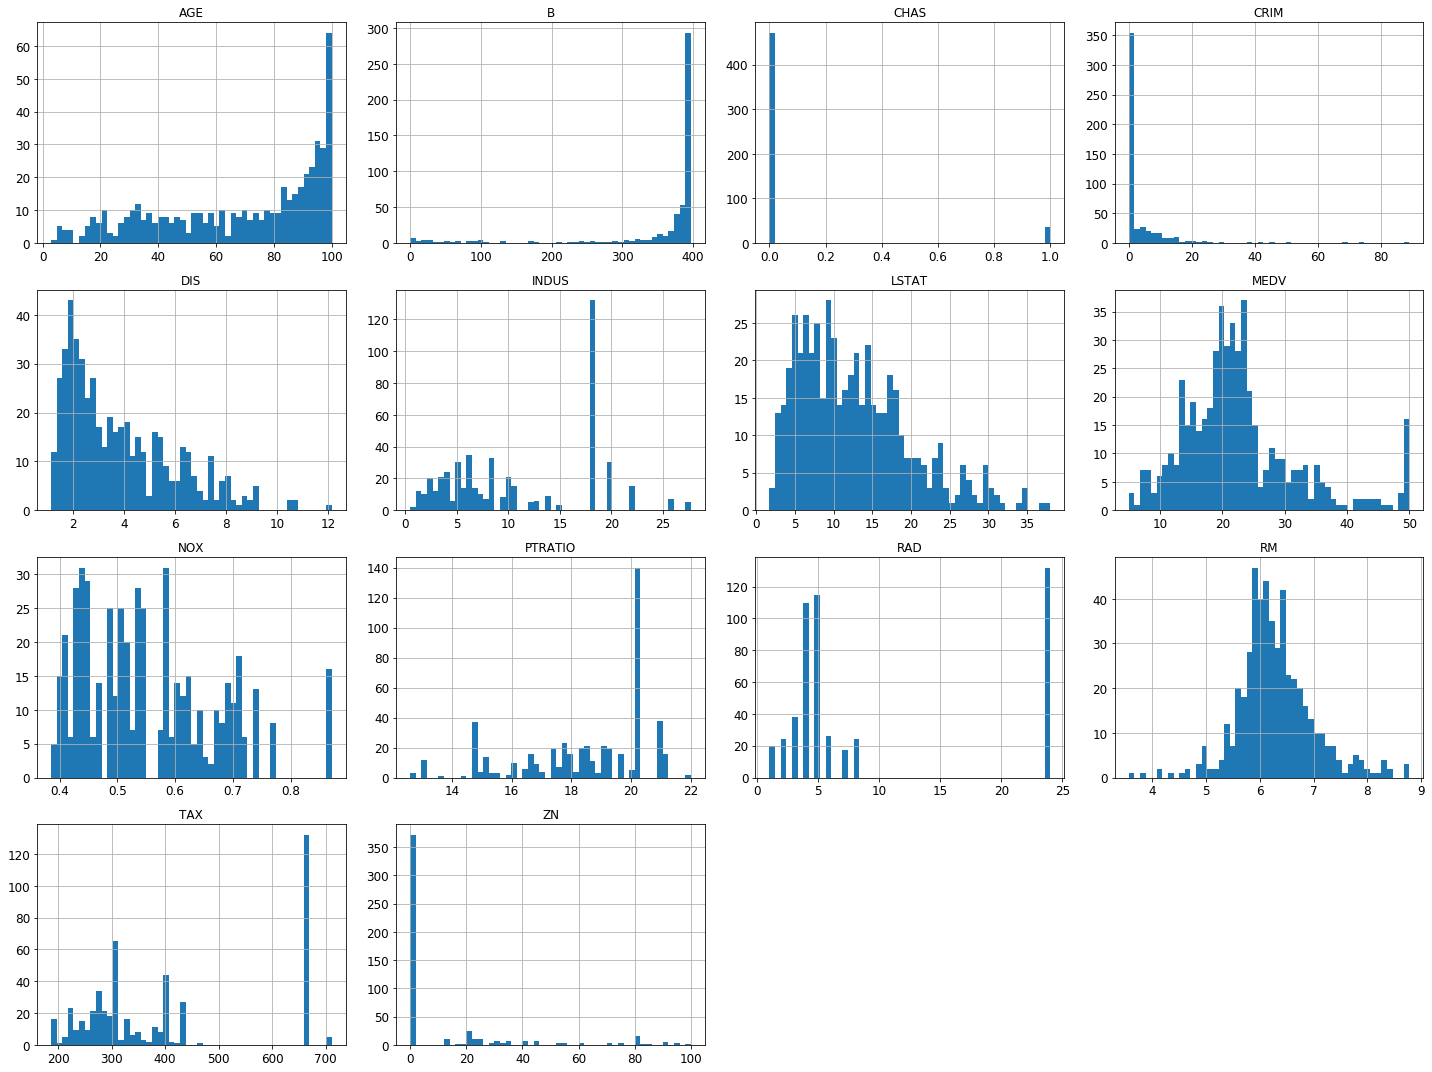

In [448]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    """An simple implementation of the spliting into train and test sets"""
    shuffled_indices = np.random.permutation(len(data)) # Give it random indexes
    test_set_size = int(len(data) * test_ratio) # split into ratio
    test_indices = shuffled_indices[:test_set_size] # extract index of test examples
    train_indices = shuffled_indices[test_set_size:] # extract index of train examples
    return data.iloc[train_indices], data.iloc[test_indices] # return the splited data

In [450]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)
print(train_set.shape)

(405, 14)


In [451]:
print(test_set.shape)

(101, 14)


If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [452]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
404,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666.0,20.2,329.46,27.38,8.5
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402.0,17.0,396.90,4.56,34.9
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666.0,20.2,3.50,16.94,13.5
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666.0,20.2,396.90,31.99,7.4


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [454]:
test_set.head() # No peeking at the test data though (data snooping bias)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27,16.1


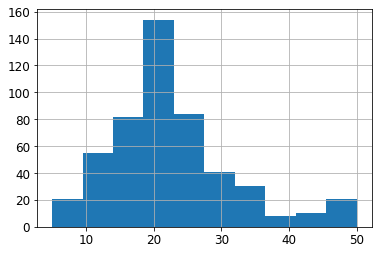

In [455]:
housing["MEDV"].hist()

**A note on the median income:** Per the team that collected the data, the numbers represent roughly tens of thousands of dollars (ie. 4 means \$40,000), and the highest income has been capped at 15 (\$150,000). Working with preprocessed data is common in ML, and it is not neccessarily a problem, we just need to understand how the data was computed.

In [0]:
# Since this histogram is "tail heavy" (extends much farther to the right from the median and to the left)
# We will try to transform this atrribute to have a more bell-shaped distribution
housing["MEDV_cat"] = pd.cut(housing["MEDV"],
                               bins=[0, 7.5, 15, 22.5, 30, 37.5, np.inf],
                               labels=[1, 2, 3, 4, 5,6])

In [457]:
housing["MEDV_cat"].value_counts()

3    200
4    125
2     86
5     49
6     35
1     11
Name: MEDV_cat, dtype: int64

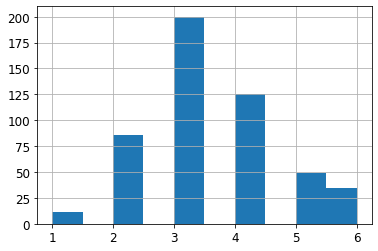

In [458]:
housing["MEDV_cat"].hist()

**Stratified Sampling:** So far we only consider random sampling methods. This is generally fine if your dataset is large enough, but if not, you are running a risk of introducing a significant sampling bias. How do we ensure the samples are representative of the whole population. For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called stratified sampling.

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["MEDV_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

A test set generated by stratified sampling has income category proportions almost identical to those in the full dataset, whether the test set generated by purely random sampling is skewed.

In [460]:
strat_test_set["MEDV_cat"].value_counts() / len(strat_test_set)

3    0.392157
4    0.245098
2    0.176471
5    0.098039
6    0.068627
1    0.019608
Name: MEDV_cat, dtype: float64

In [461]:
housing["MEDV_cat"].value_counts() / len(housing)

3    0.395257
4    0.247036
2    0.169960
5    0.096838
6    0.069170
1    0.021739
Name: MEDV_cat, dtype: float64

In [0]:
def income_cat_proportions(data):
    return data["MEDV_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [463]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.021739,0.019608,0.029412,35.294118,-9.803922
2,0.169960,0.176471,0.166667,-1.937984,3.830369
3,0.395257,0.392157,0.441176,11.617647,-0.784314
4,0.247036,0.245098,0.254902,3.184314,-0.784314
5,0.096838,0.098039,0.058824,-39.255702,1.240496
6,0.069170,0.068627,0.049020,-29.131653,-0.784314


We created "income_cat" to show you stratified sampling, so now we are no longer need "income_cat". You can "drop" it from the dataset.

In [0]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("MEDV_cat", axis=1, inplace=True)

# Step 3. Discover and visualize the data to gain insights

In [0]:
# Make a copy of the stratified train set
housing = strat_train_set.copy()

In [466]:
# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = housing.corr()
corr_matrix.shape

(14, 14)

**The correlation coefficient** ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation.

![alt text](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [467]:
# Let's look at how much each feature correlates to the house value 
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.678845
ZN         0.377469
B          0.318984
DIS        0.213334
CHAS       0.152224
RAD       -0.353756
AGE       -0.356867
CRIM      -0.370341
NOX       -0.394641
TAX       -0.437700
INDUS     -0.463546
PTRATIO   -0.537541
LSTAT     -0.715677
Name: MEDV, dtype: float64

In [468]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.691276,12.227723,11.112252,0.069307,0.553108,6.270069,67.858663,3.798289,9.618812,409.440594,18.493069,356.280495,12.634678,22.583168
std,9.092530,24.691574,6.863431,0.254290,0.112267,0.703858,28.694437,2.138276,8.756040,169.029705,2.189780,91.302222,7.165418,9.273938
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082973,0.000000,5.130000,0.000000,0.452000,5.875750,42.175000,2.100525,4.000000,279.000000,17.400000,374.650000,7.135000,16.775000
50%,0.281745,0.000000,9.690000,0.000000,0.538000,6.189000,77.150000,3.167500,5.000000,330.000000,19.100000,391.240000,11.235000,21.100000
75%,3.681942,18.500000,18.100000,0.000000,0.624000,6.629250,93.825000,5.142150,24.000000,666.000000,20.200000,396.080000,16.915000,25.025000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Step 4. Prepare the data for Machine Learning algorithms (aka Data Cleaning)

In [0]:
# Create the features and labels for training
housing = strat_train_set.drop("MEDV", axis=1) # drop labels for training set
housing_labels = strat_train_set["MEDV"].copy()

In [470]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. 

In [0]:
# from sklearn.compose import ColumnTransformer

# num_attribs = list(housing_num)
# cat_attribs = ["ocean_proximity"]

# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs),
#         ("cat", OneHotEncoder(), cat_attribs),
#     ])

housing_prepared = housing #full_pipeline.fit_transform(housing)

In [472]:
# housing_prepared
print(housing.shape)
print(housing_prepared.shape)

(404, 13)
(404, 13)


In [473]:
housing_prepared

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
409,14.43830,0.0,18.10,0,0.597,6.852,100.0,1.4655,24,666.0,20.2,179.36,19.78
429,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666.0,20.2,60.72,24.08
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437.0,21.2,394.67,16.96
419,11.81230,0.0,18.10,0,0.718,6.824,76.5,1.7940,24,666.0,20.2,48.45,22.74
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223.0,18.6,390.77,6.58
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62
386,24.39380,0.0,18.10,0,0.700,4.652,100.0,1.4672,24,666.0,20.2,396.90,28.28
178,0.06642,0.0,4.05,0,0.510,6.860,74.4,2.9153,5,296.0,16.6,391.27,6.92


# Step 5. Select and train a model 

In [474]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [475]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.833668255511003

OK, this is better than nothing but clearly not a great score: most districts’ median_housing_values range between \$120,000 and \$265,000, so a typical prediction error of $68,628 is not very satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.

In [476]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

3.413684910492207

Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data (Decision Trees are presented in more detail in Chapter 6). The code should look familiar by now:

In [477]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

**Note:** Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root

In [479]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4.47941795 4.15748618 4.18397885 5.75289514 4.40328003]
Mean: 4.595411629804952
Standard deviation: 0.5918095619299117


Let’s compute the same scores for the Linear Regression model just to be sure

In [480]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5.54773135 4.70993741 4.13132674 5.78202703 5.28836241]
Mean: 5.091876988925852
Standard deviation: 0.5985401271303824


Let’s try one last model now: the RandomForestRegressor. As we will see in Chapter 7, Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further. We will skip most of the code since it is essentially the same as for the other models:

**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [510]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=400, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [511]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.3130514357860454

Wow, this is much better: Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set

In [512]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.30029503 2.79942318 2.97382349 4.33603805 3.39713509]
Mean: 3.3613429669194033
Standard deviation: 0.5330972942042794


In [485]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
pd.Series(np.sqrt(-scores)).describe()

count    5.000000
mean     5.091877
std      0.669188
min      4.131327
25%      4.709937
50%      5.288362
75%      5.547731
max      5.782027
dtype: float64

# Step 6. Fine tune your model

In [514]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 100,300], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of ? rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

The best hyperparameter combination found:

In [515]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [516]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [517]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.869585097234095 {'max_features': 2, 'n_estimators': 3}
3.9209425371496622 {'max_features': 2, 'n_estimators': 10}
3.5912875169150027 {'max_features': 2, 'n_estimators': 30}
3.6128636263357614 {'max_features': 2, 'n_estimators': 100}
3.5632942964120913 {'max_features': 2, 'n_estimators': 300}
4.574105461730664 {'max_features': 4, 'n_estimators': 3}
3.54017261079139 {'max_features': 4, 'n_estimators': 10}
3.5083383331342732 {'max_features': 4, 'n_estimators': 30}
3.4536220494120626 {'max_features': 4, 'n_estimators': 100}
3.3522079364795427 {'max_features': 4, 'n_estimators': 300}
3.813135889986179 {'max_features': 6, 'n_estimators': 3}
3.395519951911218 {'max_features': 6, 'n_estimators': 10}
3.4061153630783094 {'max_features': 6, 'n_estimators': 30}
3.3528582912775895 {'max_features': 6, 'n_estimators': 100}
3.3029253869235937 {'max_features': 6, 'n_estimators': 300}
4.351276474965848 {'max_features': 8, 'n_estimators': 3}
3.358319155838101 {'max_features': 8, 'n_estimators': 10}
3.2

In [518]:
# View the research results in table format
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008795,0.002498,0.001894,0.000125,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-26.085473,-15.422469,-13.245967,-46.833594,-16.976792,-23.712859,12.360086,26,-7.651699e+00,-1.154076e+01,-7.637981e+00,-6.995528e+00,-9.736190e+00,-8.712432e+00,1.689669e+00
1,0.019097,0.000660,0.002494,0.000300,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-19.421589,-13.313702,-8.231742,-23.339415,-12.562504,-15.373790,5.347747,20,-3.048121e+00,-4.570526e+00,-2.841272e+00,-3.303801e+00,-3.146170e+00,-3.381978e+00,6.128926e-01
2,0.050941,0.000818,0.003587,0.000139,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-15.196952,-11.956192,-7.236260,-18.260440,-11.836886,-12.897346,3.690778,16,-2.285632e+00,-3.159248e+00,-2.514606e+00,-2.356088e+00,-2.744168e+00,-2.611949e+00,3.157348e-01
3,0.156937,0.001011,0.008891,0.000089,2,100,NaN,"{'max_features': 2, 'n_estimators': 100}",-15.673011,-11.429878,-7.813741,-16.965820,-13.381468,-13.052784,3.236259,17,-2.117026e+00,-2.558288e+00,-2.372460e+00,-2.187891e+00,-2.331639e+00,-2.313461e+00,1.536921e-01
4,0.470737,0.007720,0.023019,0.000465,2,300,NaN,"{'max_features': 2, 'n_estimators': 300}",-16.115251,-9.351680,-7.847034,-16.671775,-13.499591,-12.697066,3.545159,15,-1.947632e+00,-2.239984e+00,-2.161005e+00,-1.871537e+00,-2.008467e+00,-2.045725e+00,1.359250e-01
5,0.008180,0.000191,0.001845,0.000142,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-27.882291,-16.331317,-12.320329,-26.106420,-21.971847,-20.922441,5.856435,25,-7.358958e+00,-7.950884e+00,-7.440241e+00,-5.652497e+00,-6.569434e+00,-6.994403e+00,8.034720e-01
6,0.020828,0.000667,0.002361,0.000124,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-18.044732,-8.487262,-7.733083,-15.575178,-12.823856,-12.532822,3.978086,14,-3.364150e+00,-3.697023e+00,-3.261544e+00,-2.968439e+00,-3.439031e+00,-3.346037e+00,2.374390e-01
7,0.054684,0.001623,0.003608,0.000178,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-15.661648,-8.440514,-6.650829,-18.666910,-12.122289,-12.308438,4.442482,13,-2.186296e+00,-2.559985e+00,-2.560000e+00,-2.157901e+00,-2.659921e+00,-2.424820e+00,2.097405e-01
8,0.172976,0.003236,0.008087,0.000180,4,100,NaN,"{'max_features': 4, 'n_estimators': 100}",-15.119416,-8.599310,-7.730871,-16.670441,-11.517487,-11.927505,3.508289,11,-1.914239e+00,-2.087154e+00,-1.944733e+00,-1.821335e+00,-2.115711e+00,-1.976635e+00,1.100778e-01
9,0.528591,0.003073,0.063147,0.080312,4,300,NaN,"{'max_features': 4, 'n_estimators': 300}",-14.324090,-7.763775,-7.390552,-15.321980,-11.386093,-11.237298,3.258769,5,-1.753849e+00,-1.873699e+00,-1.817370e+00,-1.658224e+00,-1.725378e+00,-1.765704e+00,7.436538e-02


The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.


In [532]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=7, high=9),
        'max_features': randint(low=2, high=4),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [533]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.958150418532033 {'max_features': 2, 'n_estimators': 8}
4.030204772738487 {'max_features': 2, 'n_estimators': 7}
3.958150418532033 {'max_features': 2, 'n_estimators': 8}
4.030204772738487 {'max_features': 2, 'n_estimators': 7}
3.958150418532033 {'max_features': 2, 'n_estimators': 8}
4.030204772738487 {'max_features': 2, 'n_estimators': 7}
4.030204772738487 {'max_features': 2, 'n_estimators': 7}
3.937588251019639 {'max_features': 3, 'n_estimators': 7}
3.8718558387413355 {'max_features': 3, 'n_estimators': 8}
3.937588251019639 {'max_features': 3, 'n_estimators': 7}


You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [534]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.05797514, 0.00355654, 0.04093712, 0.00079829, 0.04924116,
       0.3862397 , 0.01828349, 0.06115628, 0.00274518, 0.01239389,
       0.03731509, 0.01205827, 0.31729984])

In [0]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

X_test_prepared = (X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [543]:
final_rmse

2.880557300722396

We can compute a 95% confidence interval for the test RMSE:

In [497]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.18269312, 3.05590728])

I believe my lowest RMSE with cv=5 is 3.35 as seen below.
I achieved an RMSE of 2.65 above on the strat_test_set

In [539]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=300, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores: [3.32520199 2.78728423 2.9481098  4.34901643 3.41926569]
Mean: 3.365775626727126
Standard deviation: 0.5441262580029456
